In [1]:
!echo $PATH

/opt/cloudera/parcels/Anaconda-4.3.1/bin:/opt/cloudera/parcels/Anaconda-4.3.1/bin:/usr/local/firefox:/sbin:/usr/java/jdk1.7.0_67-cloudera/bin:/usr/local/apache-ant/apache-ant-1.9.2/bin:/usr/local/apache-maven/apache-maven-3.0.4/bin:/usr/local/bin:/usr/bin:/bin:/usr/local/sbin:/usr/sbin:/sbin:/home/cloudera/bin



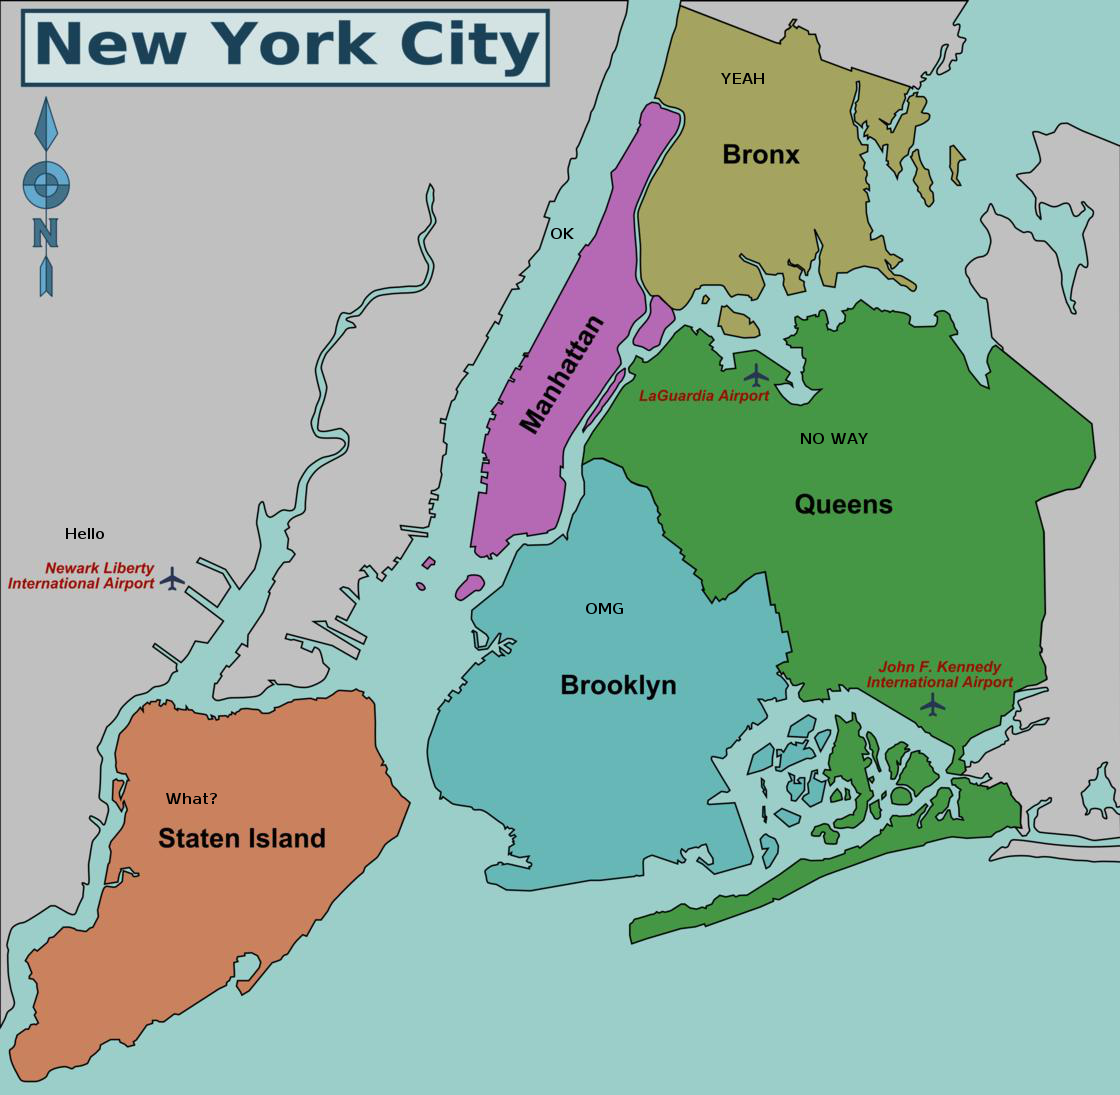

In [5]:
import PIL
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.display import HTML
from io import BytesIO
from base64 import b64encode


newark = "Hello"
staten_island = "What?"
queens = "NO WAY"
manhattan = "OK"
bronx = "YEAH"
brooklyn = "OMG"
pil_im = Image.open('nycborough.jpeg')
b = BytesIO()  



font = ImageFont.truetype(font="/usr/share/fonts/dejavu/DejaVuSans-Bold.ttf", size=15)
#font = ImageFont.load("arial.pil")


draw = ImageDraw.Draw(pil_im)
draw = ImageDraw.Draw(pil_im).text((585,600), brooklyn, (0,0,0), font=font)
draw1 = ImageDraw.Draw(pil_im).text((65, 525), newark,(0,0,0), font=font)
draw2 = ImageDraw.Draw(pil_im).text((800,430), queens, (0,0,0), font=font)
draw3 = ImageDraw.Draw(pil_im).text((720,70), bronx, (0,0,0), font=font)
draw4 = ImageDraw.Draw(pil_im).text((165, 790), staten_island,(0,0,0), font=font)
draw5 = ImageDraw.Draw(pil_im).text((550, 225), manhattan,(0,0,0), font=font)

 
pil_im.save(b, format='png')
HTML("<img src='data:image/png;base64,{0}'/>".format(b64encode(b.getvalue()).decode('utf-8')))

In [9]:
import os  
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-streaming-kafka-0-8_2.11:2.0.2 pyspark-shell' 

import kafka
from kafka import SimpleProducer, SimpleClient

TOPIC = "test-topic"

# To send messages synchronously
client = SimpleClient('localhost:9092')
producer = SimpleProducer(client, async=False)

# Note that the application is responsible for encoding messages to type bytes
producer.send_messages(TOPIC, 'Message 1')
producer.send_messages(TOPIC, 'Message 2', 'Message 3')


# To wait for acknowledgements
# ACK_AFTER_LOCAL_WRITE : server will wait till the data is written to
#                         a local log before sending response
# ACK_AFTER_CLUSTER_COMMIT : server will block until the message is committed
#                            by all in sync replicas before sending a response
producer = SimpleProducer(client,
                          async=False,
                          req_acks=SimpleProducer.ACK_AFTER_LOCAL_WRITE,
                          ack_timeout=2000,
                          sync_fail_on_error=False)

responses = producer.send_messages(TOPIC, 'another message')

KafkaUnavailableError: KafkaUnavailableError: All servers failed to process request: [('localhost', 9092, 0)]

In [10]:
from kafka import SimpleProducer, SimpleClient, SimpleConsumer

TOPIC = "test-topic"
# To consume messages
client = SimpleClient('localhost:9092')
consumer = SimpleConsumer(client, None, TOPIC)
for message in consumer:
    # message is raw byte string -- decode if necessary!
    # e.g., for unicode: `message.decode('utf-8')`
    print(message.message.value)


# Use multiprocessing for parallel consumers
#from kafka import MultiProcessConsumer

# This will split the number of partitions among two processes
#consumer = MultiProcessConsumer(client, None, TOPIC, num_procs=2)

# This will spawn processes such that each handles 2 partitions max
#consumer = MultiProcessConsumer(client, None, TOPIC,
#                                partitions_per_proc=2)

#for message in consumer:
#    print(message.value)

#for message in consumer.get_messages(count=5, block=True, timeout=4):
#    print(message.value)

client.close()

KafkaUnavailableError: KafkaUnavailableError: All servers failed to process request: [('localhost', 9092, 0)]

In [11]:
################ image processing stuff ##########
import PIL
import sys
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.core.display import HTML, display
from IPython.display import clear_output
from io import BytesIO
from base64 import b64encode

imgCoordinates = [
    (585,600), 
    (65, 525) 
]

def drawData( values ):
    # init
    font = ImageFont.truetype(font="/usr/share/fonts/dejavu/DejaVuSans-Bold.ttf", size=15)
    pil_im = Image.open('nycborough.jpeg')
    b = BytesIO()  
    
    # add text for each coordinate given!
    ImageDraw.Draw(pil_im)
    for i in range(len(values)):
        print(values[i])
        draw = ImageDraw.Draw(pil_im).text(imgCoordinates[i], values[i], (0,0,0), font=font)

    pil_im.save(b, format='png')
    
    clear_output()
    display(HTML("<img src='data:image/png;base64,{0}'/>".format(b64encode(b.getvalue()).decode('utf-8'))))
    return;

######## Kafka consumer part #########
from kafka import SimpleProducer, SimpleClient, SimpleConsumer
import time


TOPIC = "test-topic"
# To consume messages
client = SimpleClient('localhost:9092')
consumer = SimpleConsumer(client, None, TOPIC)
for message in consumer:
    # message is raw byte string -- decode if necessary!
    # e.g., for unicode: `message.decode('utf-8')`
    drawData([message.message.value])

client.close()

KafkaUnavailableError: KafkaUnavailableError: All servers failed to process request: [('localhost', 9092, 0)]